# Support Vector Machines

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

## Data Frame creation

In [2]:
df = pd.read_csv('data.csv', index_col=[0])

In [3]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
df.tail()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0
862,15,27,1,70.0,0,0,14,31,19,12,3,1,0,0


In [5]:
df.shape

(863, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


### One Hot Encoding:

In [7]:
one = OneHotEncoder(sparse=False)

In [8]:
loc=pd.DataFrame(one.fit_transform(df[['location']]))
con=pd.DataFrame(one.fit_transform(df[['country']]))
gen=pd.DataFrame(one.fit_transform(df[['gender']]))
s1=pd.DataFrame(one.fit_transform(df[['symptom1']]))
s2=pd.DataFrame(one.fit_transform(df[['symptom2']]))
s3=pd.DataFrame(one.fit_transform(df[['symptom3']]))
s4=pd.DataFrame(one.fit_transform(df[['symptom4']]))
s5=pd.DataFrame(one.fit_transform(df[['symptom5']]))
new_df = pd.concat ([loc,con,gen,s1,s2,s3,s4,s5], axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,7,8,9,10,11,12,0,1,2,3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [9]:
new_df= pd.concat((new_df,df['age'],df['vis_wuhan'],df['from_wuhan'],df['symptom6'],df['diff_sym_hos'],df['result']),axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,age,vis_wuhan,from_wuhan,symptom6,diff_sym_hos,result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,66.0,1,0,1,8,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,56.0,0,1,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,46.0,0,1,1,13,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,60.0,1,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,58.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,24.0,0,0,1,0,1
859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,35.0,0,0,1,0,0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,49.4,0,0,1,0,0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,49.4,0,0,1,0,0


#### New data frame

In [10]:
new_df= new_df.drop(columns=['symptom6'], axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,12,0,1,2,3,age,vis_wuhan,from_wuhan,diff_sym_hos,result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,66.0,1,0,8,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,56.0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,46.0,0,1,13,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,60.0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,58.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,24.0,0,0,0,1
859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,35.0,0,0,0,0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,49.4,0,0,0,0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,49.4,0,0,0,0


In [11]:
new_df.isnull().sum()

0               0
1               0
2               0
3               0
4               0
               ..
age             0
vis_wuhan       0
from_wuhan      0
diff_sym_hos    0
result          0
Length: 275, dtype: int64

# Modeling:

In [12]:
x = new_df.drop(columns=['result'])
y = new_df['result']

In [13]:
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### SVM classifier:

In [14]:
options_paramters= [
{
'kernel' : ['linear', 'poly', 'rbf','sigmoid'],
'C' : [0.1,1,10,100,1000],
'degree' : range(0,9),
'gamma':[1,0.1,0.01,0.001, 0.0001],
'gamma':['scale', 'auto'],
'probability' : [True]
}
]
classifier = GridSearchCV(SVC(), param_grid = options_paramters, cv = 5, verbose=True, n_jobs=-1)
best_clf = classifier.fit(x_train,y_train)
best_clf.best_estimator_

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


SVC(C=10, degree=8, kernel='poly', probability=True)

In [15]:
best_clf.best_params_

{'C': 10, 'degree': 8, 'gamma': 'scale', 'kernel': 'poly', 'probability': True}

In [16]:
svm = SVC(C=10, degree=8, kernel='poly',gamma='scale', probability= True)
#svm = SVC(C=1000,kernel='rbf',gamma='auto', probability= True)
#svm = SVC(C=0.1, degree=5, kernel='poly',gamma='auto', probability= True)
svm.fit(x_train, y_train)  

SVC(C=10, degree=8, kernel='poly', probability=True)

In [17]:
y_train_predict = cross_val_predict(svm, x_train, y_train , cv = 5)

### Predicted Vs Training data

In [18]:
precision=precision_score(y_train ,y_train_predict)
recall=recall_score(y_train ,y_train_predict)
f1=f1_score(y_train ,y_train_predict)
auc=roc_auc_score(y_train,y_train_predict)
print("accuarcy",accuracy_score(y_train ,y_train_predict))
print("precision",precision)
print("recall",recall)
print("f1:",f1)
print("auc:",auc)

accuarcy 0.9652173913043478
precision 0.9117647058823529
recall 0.775
f1: 0.8378378378378379
auc: 0.8825819672131148


### Predicted Vs Test data

In [19]:
y_pred = svm.predict(X_test)

In [20]:
y_test_score=svm.predict_proba(X_test)
print("auc",roc_auc_score(y_test,y_test_score[:,1]))
print("f1",f1_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))
print("accuarcy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))


auc 0.9655172413793104
f1 0.8235294117647057
recall 0.75
accuarcy 0.9479768786127167
precision 0.9130434782608695


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       145
           1       0.91      0.75      0.82        28

    accuracy                           0.95       173
   macro avg       0.93      0.87      0.90       173
weighted avg       0.95      0.95      0.95       173



### Confusion Matrix: 

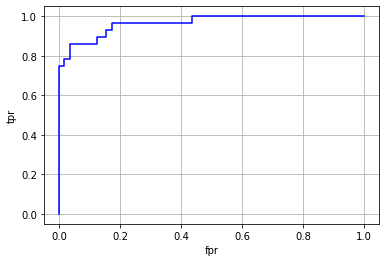

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_score[:,1])
plt.plot(fpr,tpr, "b")
plt.grid()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

<AxesSubplot:>

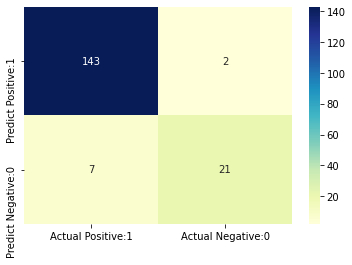

In [23]:
cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [24]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  143

True Negatives(TN) =  21

False Positives(FP) =  2

False Negatives(FN) =  7


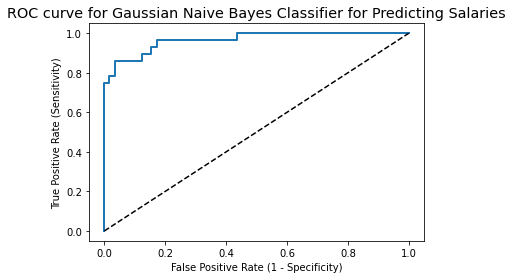

In [25]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_score[:,1])

plt.figure(figsize=(6,4))

plt.plot(false_positive_rate, true_positive_rate, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()